In [1]:
import anndata as ad
import scvi
import scanpy as sc
import mrvi
import pandas as pd
import scipy as sp
import numpy as np
import pickle as pkl
from sklearn.cluster import KMeans
import igraph as ig
import leidenalg as la

Global seed set to 0
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [2]:
adata = sc.read('./../data/MrVIoutputs/bacdrop.h5ad')

# with open('./../data/pickles/mrvi_model.pickle', 'rb') as instream:
#     model = pkl.load(instream)

# with open('./../data/pickles/sample_distances.pickle', 'rb') as instream:
#     sample_distances = pkl.load(instream)

# with open('./../data/pickles/sample_representations.pickle', 'rb') as instream:
#     sample_representations = pkl.load(instream)

# Preprocessing

In [3]:
# "sequenced Replicate 1 with ∼5,000 reads/cell and Replicate 2 with ∼3,000 reads/cell", for simplicity will call the normalization target 5,000
sc.pp.filter_cells(adata, min_genes=30)
sc.pp.normalize_total(adata, target_sum=5000)
sc.pp.log1p(adata)
adata.raw = adata

In [4]:
adata

AnnData object with n_obs × n_vars = 13123 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys'

# Clustering in latent space

In [5]:
sc.pp.neighbors(adata, use_rep='X_mrvi_z', knn=True)

In [6]:
sc.tl.umap(adata)
# sc.pl.embedding(adata, basis='X_mrvi_z')

In [7]:
sc.tl.leiden(adata)

# Extracting and Visualizing 

In [8]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
# sc.pl.rank_genes_groups(model.adata, n_genes=25, sharey=False)

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


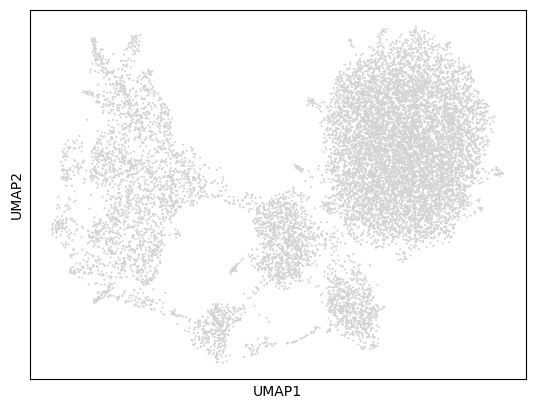

In [9]:
sc.pl.umap(adata, use_raw=True)
# sc.pl.embedding(adata, basis='X_mrvi_z')

In [10]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,cds-WP_002919766.1,cds-WP_004174069.1-2,cds-WP_012068464.1,cds-WP_002920554.1,cds-WP_004174069.1,cds-WP_002898162.1,cds-WP_002919796.1,cds-WP_032430362.1,cds-WP_171290763.1,cds-WP_013815099.1-30,...,cds-WP_004145074.1,cds-WP_012068464.1,cds-WP_004174069.1-2,cds-WP_013815099.1-29,cds-WP_004174069.1-2,cds-WP_013815099.1-79,cds-WP_000242758.1,cds-WP_002919219.1,cds-WP_002919773.1,cds-WP_002910077.1
1,cds-WP_032424651.1,cds-WP_004174069.1,cds-WP_002888735.1,cds-WP_004150943.1,cds-WP_004174069.1-2,cds-WP_002920103.1,cds-WP_012068464.1,cds-WP_050484295.1,cds-WP_032429520.1,cds-WP_013815099.1-48,...,cds-WP_001181005.1,cds-WP_002898408.1,cds-WP_032429669.1,cds-WP_013815099.1-78,cds-WP_002884743.1,cds-WP_013815099.1-35,cds-WP_002889299.1,cds-WP_032430210.1,cds-WP_002887843.1,cds-WP_021440992.1
2,cds-WP_020802781.1,cds-WP_004151070.1,cds-WP_004144748.1,cds-WP_002882755.1,cds-WP_002888735.1,cds-WP_032424651.1,cds-WP_000617546.1,cds-WP_002913016.1,cds-WP_179139609.1,cds-WP_013815099.1-49,...,cds-WP_004151523.1,cds-WP_002915213.1,cds-WP_012068464.1,cds-WP_013815099.1-71,cds-WP_002895166.1,cds-WP_013815099.1-63,cds-WP_050484291.1,cds-WP_002898303.1,cds-WP_002884725.1,cds-WP_002913950.1
3,cds-WP_002919516.1,cds-WP_000135199.1,cds-WP_002920103.1,cds-WP_004174069.1,cds-WP_004179067.1,cds-WP_012068464.1,cds-WP_002919667.1,cds-WP_002914769.1,cds-WP_170999280.1,cds-WP_013815099.1-65,...,cds-WP_004146997.1,cds-WP_032424651.1,cds-WP_002918559.1,cds-WP_013815099.1-42,cds-WP_004174069.1,cds-WP_013815099.1-62,cds-AF52_RS0124460,cds-WP_002915934.1,cds-WP_002888735.1,cds-WP_002889292.1
4,cds-WP_001138115.1,cds-WP_001207203.1,cds-WP_020802781.1,cds-WP_002918250.1,cds-WP_002884146.1,cds-WP_002895039.1,cds-WP_004150800.1,cds-WP_004146620.1,cds-AF52_RS26890,cds-AF52_RS0123810,...,cds-WP_002885441.1,cds-WP_032428654.1,cds-WP_020802781.1,cds-WP_013815099.1-6,cds-WP_002922413.1,cds-WP_013815099.1-56,cds-AF52_RS0124535,cds-WP_004149864.1,cds-WP_004900926.1,cds-WP_002913362.1


/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


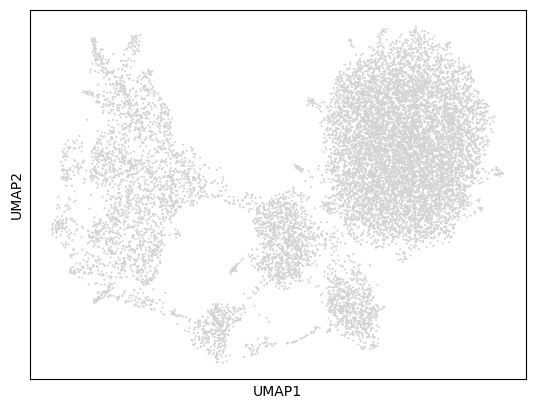

In [11]:
sc.pl.umap(adata, use_raw=False)

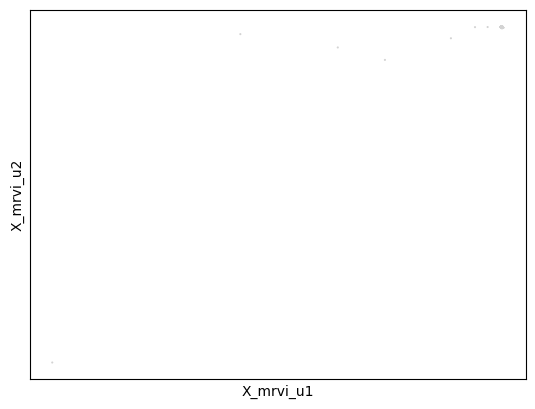

In [12]:

sc.pl.embedding(adata, basis='X_mrvi_u')

"Multiple values can be given to color. In the following example we will plot 6 genes: ‘CD79A’, ‘MS4A1’, ‘IGJ’, CD3D’, ‘FCER1A’, and ‘FCGR3A’ to get an idea on where those marker genes are being expressed."

In [13]:
# TODO: figure out the markers for bacdrop and plot adding them as the colour label to identify where they're being expressed 
# e.g. sc.pl.umap(pbmc, color=['CD79A', 'MS4A1', 'IGJ', 'CD3D', 'FCER1A', 'FCGR3A', 'n_counts', 'bulk_labels'])